In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KalmanFilter():
    def __init__(self, n_feature, Q=0.001, R=1):        
        self.I = np.eye(n_feature)
        self.F = np.eye(n_feature)
        self.H = np.eye(n_feature)

        self.Q = np.eye(n_feature) * Q
        self.R = np.eye(n_feature) * R

    def _step(self, x_old, P_old, z_new):
        # predict
        x_new_prior = np.dot(self.F, x_old)
        P_new_prior = np.dot(np.dot(self.F, P_old), self.F.T) + self.Q

        # update
        K_new = np.dot(np.dot(P_new_prior, self.H.T), np.linalg.pinv(np.dot(np.dot(self.H, P_new_prior), self.H.T) + self.R))
        x_new = x_new_prior + np.dot(K_new, (z_new - np.dot(self.H, x_new_prior)))
        P_new = np.dot(self.I - np.dot(K_new, self.H), P_new_prior)
        return x_new, P_new

    def smooth(self, arr):
        arr = arr.T
        res = []

        x = np.zeros((arr.shape[0], 1))
        P = np.ones((arr.shape[0], arr.shape[0]))

        for i in range(arr.shape[-1]):
            z = arr[:, i].reshape(-1, 1)
            x, P = self._step(x, P, z)
            res.append(x)
        res = np.hstack(res).T
        return res

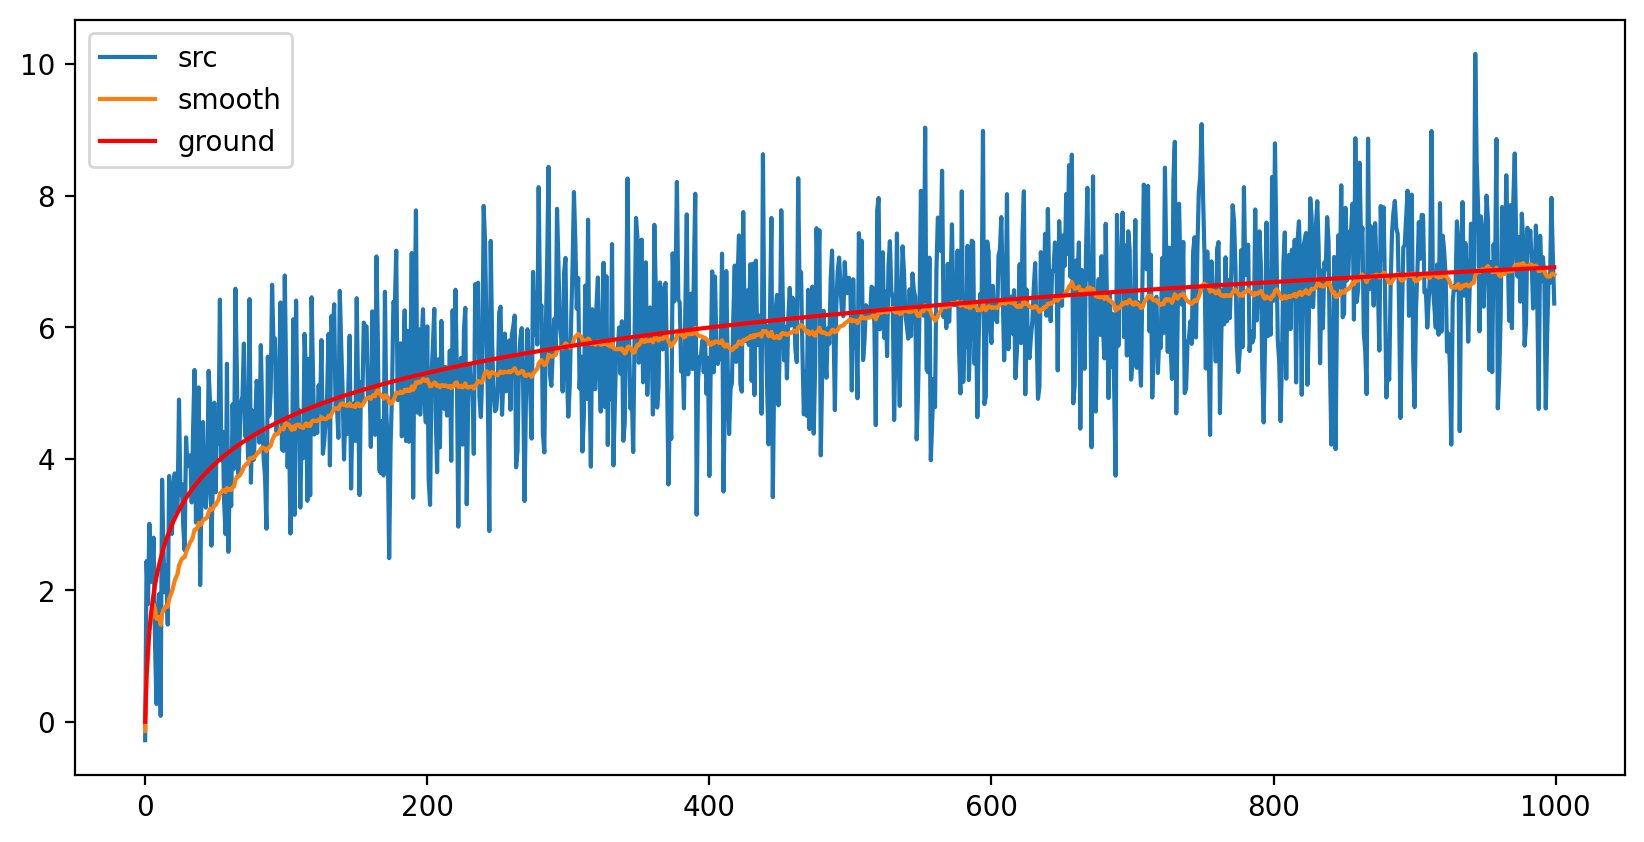

In [3]:
kf = KalmanFilter(n_feature=1)
x = np.array([i for i in range(1, 1001)])

ground_data = np.log(x)
src_data = ground_data + np.random.randn(1000)
smooth_data = kf.smooth(src_data.reshape(-1, 1))

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(src_data, label='src')
plt.plot(smooth_data, label='smooth')
plt.plot(ground_data, label='ground', c='r')
plt.legend()